# 4-Class Motor Imagery Paradigm

In [1]:
#download data
#Subject1  Capture 19/01/2022
FILEID = "1gQJKCPv_qKEh0LtpVoNY-yCOg4pbXCin" 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O motor_imagery-19-01-22.h5 && rm -rf /tmp/cookies.txt

#Subject2  Capture 26/01/2022
FILEID = "1EHFggdIv__m9Yf2hLwd_P-X-qdq5zLiM" 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O motor_imagery-01_19_22-20_07_03.h5 && rm -rf /tmp/cookies.txt

#Subject3  Capture 02/02/2022
FILEID = "1wcLx4iNLfrfgt7a2hHCOfQ0sm2078edH" 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O record-01_28_22-14_03_31.h5 && rm -rf /tmp/cookies.txt

#Zip codes
FILEID = "1sui-FJI5znNJuQOk0whM6PALI89XfKss"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt

!unzip codigos.zip


SSL_INIT
--2022-02-21 15:02:43--  https://docs.google.com/uc?export=download&confirm=t&id=1gQJKCPv_qKEh0LtpVoNY-yCOg4pbXCin
SSL_INIT
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving docs.google.com (docs.google.com)... 142.250.78.14, 2800:3f0:4005:407::200e
Connecting to docs.google.com (docs.google.com)|142.250.78.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/to79c742tlqdatuhdfeu87oge8se08io/1645473750000/07414455255309107998/*/1gQJKCPv_qKEh0LtpVoNY-yCOg4pbXCin?e=download [following]
--2022-02-21 15:02:43--  https://doc-04-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/to79c742tlqdatuhdfeu87oge8se08io/1645473750000/07414455255309107998/*/1gQJKCPv_qKEh0LtpVoNY-yCOg4pbXCin?e=download
SSL_INIT
Resolving doc-04-20-docs.googleusercontent.com (doc-04-20-docs.googleusercontent.com)... 142.250.78.1, 2800:3f0:4005:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#install necessary libraries
!pip install openbci-stream > /dev/null

In [4]:
#import necessary libraries
from openbci_stream.utils.hdf5 import HDF5Reader
from matplotlib import pyplot as plt
from warnings import filterwarnings
import mne
filterwarnings("ignore")

# 4-Class Motor Imagery

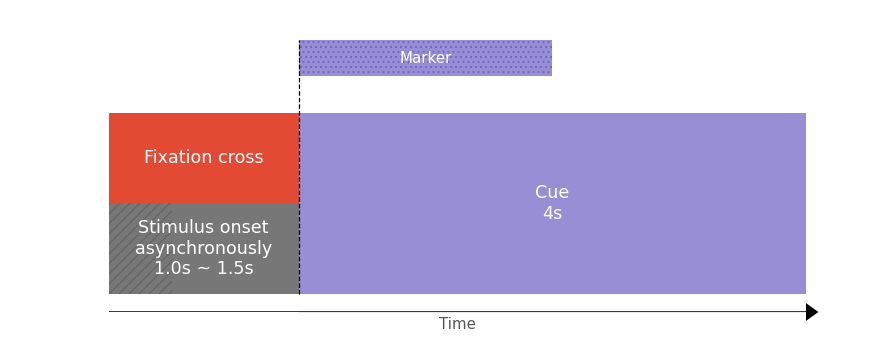

https://docs.bciframework.org/en/latest/notebooks/bci_framework/default_extensions/Class_motor_imagery_Pacman/paradigm.html

*We have the data of a subject performing a motor imagery test, with a standard 1020 setup, 1000 Hz, 16 channels and 4 classes (1,2,3,4) corresponding to (left, right, bottom, up)*

In [5]:
with HDF5Reader('motor_imagery-01_19_22-20_07_03.h5') as reader:
    print(reader)
    
    eeg = reader.eeg
    aux = reader.aux
    timestamp = reader.timestamp
    aux_timestamp = reader.aux_timestamp
    header = reader.header
    markers = reader.markers

motor_imagery-01_19_22-20_07_03.h5
2022-01-19 20:07:03.725021
MARKERS: ['Up', 'Right', 'Left', 'Bottom']
SAMPLE_RATE: 1000
STREAMING_SAMPLE_RATE: 1000
DATETIME: 1642640823.725021
MONTAGE: standard_1020
CHANNELS: {1: 'Fp1', 2: 'Fp2', 3: 'F7', 4: 'F3', 5: 'Fz', 6: 'F4', 7: 'F8', 8: 'T7', 9: 'C3', 10: 'Cz', 11: 'C4', 12: 'T8', 13: 'P7', 14: 'P3', 15: 'P8', 16: 'P4'}
CHANNELS_BY_BOARD: [16]
SHAPE: [16, 1145997]


## Load data

In [6]:
data, classes = reader.get_data(tmax=4, tmin=-0.5, markers=['Right', 'Left', 'Bottom', 'Up'])
data.shape # trials, channels, time

(180, 16, 4500)

In [6]:
# Classes
classes

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [7]:
# Class names
reader.markers.keys()

dict_keys(['Up', 'Right', 'Left', 'Bottom'])

## Standard 10-20 

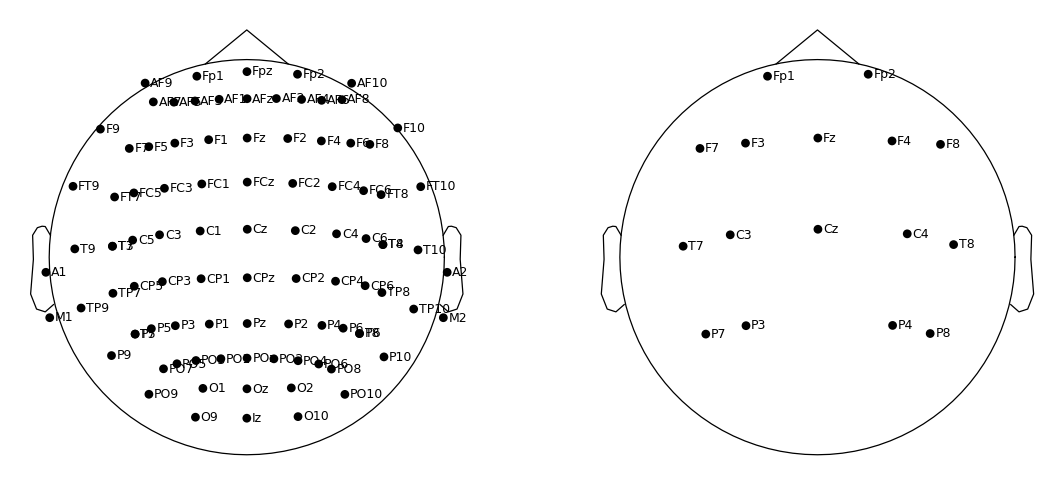

In [9]:
plt.figure(figsize=(15, 8), dpi=90)

# Channels
channel_names=list(header['channels'].values())
fs=header['sample_rate']


# channel names should be adjusted to mount 10-20 of mne
montage = mne.channels.make_standard_montage('standard_1020') #"standard_1020"
info = mne.create_info(montage.ch_names, sfreq=fs, ch_types="eeg")
info.set_montage(montage)
ax1 = plt.subplot(121)
mne.viz.plot_sensors(info, show_names=True, axes=ax1, show=False)


# database channels - Must be tuned for testing with OpenBCI
# Create an mne object with the assembly of the used electrodes
montage = mne.channels.make_standard_montage('standard_1020')
info = mne.create_info(channel_names, sfreq=fs, ch_types="eeg")
info.set_montage(montage)
ax2 = plt.subplot(122)
mne.viz.plot_sensors(info, show_names=True,axes=ax2)

plt.show()

In [13]:
import sys
import numpy as np
import mne
from mne.channels.montage import _set_montage
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import io as sio
plt.close('all') 
sys.path.insert(1, './CodesBCIITL')
%matplotlib inline
from MIfunctions import * #import all eeg handling functions with mne

(0.0, 1.0)

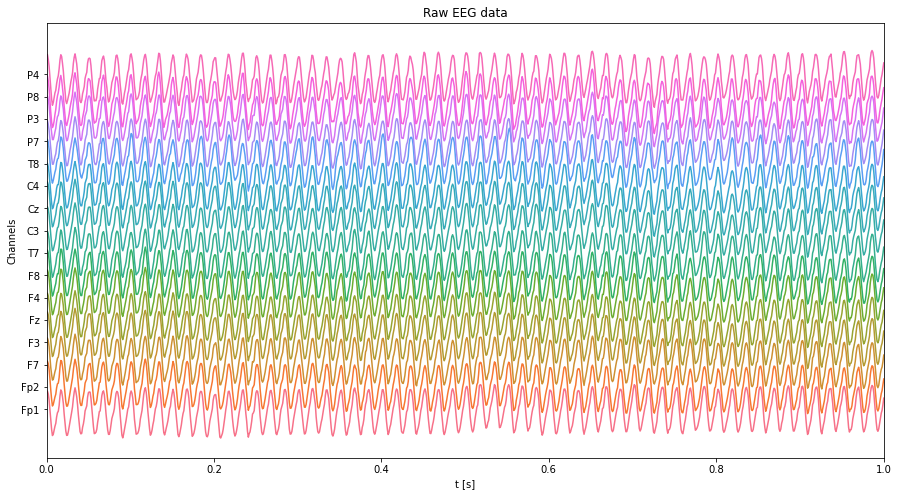

In [ ]:
#To plot the raw EEG signal
i = 1 #Trial number, in our cases: Subject1: 0-160, Subject2: 0-180
plt.figure(figsize=(15,8)) #Size of the figure
plot_eeg(data[i],sample_rate=fs,channels_names=channel_names) #Signal, signal trial, sampling frequency, name of the channels to make the graph
plt.title('Raw EEG data')
plt.xlabel('t [s]')
plt.ylabel('Channels')
plt.xlim([0,1])

# Clasificación a pedal

In [10]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    gráfica la matriz de confusión con y sin normalización
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión normalizada'
        else:
            title = 'Matriz de confusión'

    # calcular matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    # se identifican las etiquetas en los datos
    classes = classes #[unique_labels(y_true, y_pred)]
    if normalize:
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # mostrar ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta original',
           xlabel='Predicción')

    # Rotar ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # textos.
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [11]:
#librerias a importar
import scipy.io as sio
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

import warnings
warnings.filterwarnings("ignore")

# Filter Bank CSP 

In [8]:
from scipy import signal
import numpy as np
y=classes
f_frec = np.array([[1,4],[4,8],[8,12],[12,30]]) #arreglo con bandas de interes alpha y beta
csp = CSP_epochs_filter_extractor(fs=fs,f_frec=f_frec,ncomp = data.shape[1],reg='empirical') #contruir modelo csp
Xdata_csp = csp.fit_transform(data,y) #encontrar canales rotados con csp
print(data.shape,Xdata_csp.shape)

NameError: name 'fs' is not defined

#Pipeline 

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
#Particion entrenamiento y evaluación
# Tamaño Xtrain 70%, Tamaño Xtest 30%
Xtrain, Xtest, ytrain,ytest = train_test_split(Xdata_csp,y,test_size=0.3, random_state=123) 
Xtrain.shape

(126, 16, 4500)

In [ ]:
#Escoger modelo por gridsearchCV utilizando pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.pipeline import Pipeline


#se crean listas de steps (pipelines)
steps=[[
      ('nor', StandardScaler()),
      ('cla', SVC(kernel='rbf'))],#Pipeline3
   
      ]
       
parameters = [
              {
             'cla__C': [1,10,1e2,1e3,1e4],
             'cla__gamma': [1e-3, 1e-2, 1e-1,1, 10]    #Pipeline3 - hyperparametros 
              }
             ]

label_models = [ 'MinMax_SVCrbf']

models = []
filename = '/content/drive/MyDrive/RESULTADOS SEG_2'
for i in range(len(steps)): # recorrer modelos según lista pipeline
    print('modelo %d/%d' % (i+1,len(steps)))
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=-1,cv=10,
                                scoring='accuracy',refit= True,verbose=10)#gridsearch para modelo i
    grid_search.fit(Xtrain, ytrain)
    #mejor modelo entrenado
    models += [grid_search] #guardar modelos
    
joblib.dump(models,filename+"/im_modelo.pkl")

modelo 1/1
Fitting 10 folds for each of 25 candidates, totalling 250 fits


['/content/drive/MyDrive/RESULTADOS SEG_2/im_modelo.pkl']

Evaluando modelo MinMax_SVCrbf (1/1)


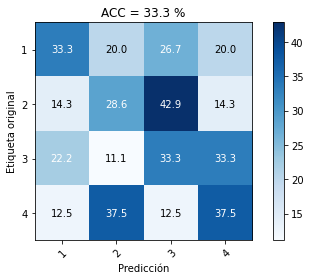

              precision    recall  f1-score   support

           1       0.45      0.33      0.38        15
           2       0.29      0.29      0.29        14
           3       0.20      0.33      0.25         9
           4       0.43      0.38      0.40        16

    accuracy                           0.33        54
   macro avg       0.34      0.33      0.33        54
weighted avg       0.36      0.33      0.34        54



In [ ]:
#%% evaluar sobre Xtest
my_model_loaded = joblib.load(filename+"/im_modelo.pkl") 
path_img = ''
for i in range(len(my_model_loaded)):
    print('Evaluando modelo %s (%d/%d)' % (label_models[i],i+1,len(my_model_loaded)))

    ytest_e = my_model_loaded[i].best_estimator_.predict(Xtest)
    acc = accuracy_score(ytest,ytest_e)
     
    plot_confusion_matrix(
                          ytest, ytest_e, 
                          classes=[1,2,3,4],
                          normalize=True,
                          title='ACC = %.1f %%' % (100*acc)
                          )
    plt.autoscale()
    #save_fig(path_img,label_models[i])                     
    plt.show()
    
    cr = classification_report(
                               ytest, ytest_e, 
                               )                          
    #support = #muestras en la clase estudiada
    print(cr)

#Pipeline (csp,standard_scaler, svc)

In [9]:
#Escoger modelo por gridsearchCV utilizando pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.pipeline import Pipeline
from scipy import signal
import numpy as np
from MIfunctions import CSP_epochs_filter_extractor
fs = 1000

#Particion entrenamiento y evaluación

# Tamaño Xtrain 70%, Tamaño Xtest 30%
from sklearn.model_selection import train_test_split, GridSearchCV
Xtrain, Xtest, ytrain,ytest = train_test_split(data,y,test_size=0.3, random_state=123) 
Xtrain.shape

(126, 16, 4500)

In [1]:
y=classes # labels

f_frec = np.array([[1,4],[4,8],[8,12],[12,30]]) #arreglo con bandas de interes alpha y beta
csp = CSP_epochs_filter_extractor(fs=fs,f_frec=f_frec,ncomp = data.shape[1],reg='empirical') #construir modelo csp

#se crean listas de steps (pipeline)
steps=[
       [
        ('c_',CSP_epochs_filter_extractor(fs=fs,f_frec=f_frec,ncomp = data.shape[1],reg='empirical')),
        ('nor', StandardScaler()),
        ('cla', SVC(kernel='rbf')),
       ],#Pipeline1   
      ]
       
parameters = [
              {
             'cla__C': [1,10,1e2,1e3,1e4],
             'cla__gamma': [1e-3, 1e-2, 1e-1,1, 10]    #Pipeline1 - hyperparametros 
              }
             ]

label_models = ['StandarScaler_SVCrbf']

models = []
# filename = '/content/drive/MyDrive/RESULTADOS SEG_2'
for i in range(len(steps)): # recorrer modelos según lista pipeline
    print('modelo %d/%d' % (i+1,len(steps)))
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=-1,cv=10,
                                scoring='accuracy',refit= True,verbose=10)#gridsearch para modelo i
    grid_search.fit(Xtrain, ytrain)
    #mejor modelo entrenado
    models = grid_search #guardar modelo
    
joblib.dump(models, "im_modelo.pkl")

<>:6: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:6: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


NameError: name 'classes' is not defined

In [1]:
joblib.dump(models, "model_arch.pkl")

NameError: name 'joblib' is not defined

In [52]:
#%% evaluar sobre Xtest
def ypredict(filename,label_models,ytest):
  my_model_loaded = joblib.load(filename+"/im_modelo.pkl") 
  path_img = ''
  #for i in range(len(my_model_loaded)):
  #print('Evaluando modelo %s (%d/%d)' % (label_models[i],i+1,my_model_loaded)))
  ytest_e = my_model_loaded.best_estimator_.predict(Xtest[:ytest.shape[0],:,:]) # linea de predicción para los trials seleccionados
  acc = accuracy_score(ytest,ytest_e)     
  plot_confusion_matrix(
                         ytest, ytest_e, 
                         classes=[1,2,3,4],
                         normalize=True,
                         title='ACC = %.1f %%' % (100*acc)
                         )
  plt.autoscale()
  #save_fig(path_img,label_models[i])                     
  # plt.show()
  cr = classification_report(ytest, ytest_e)                          
  #support = #muestras en la clase estudiada
  print(cr)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



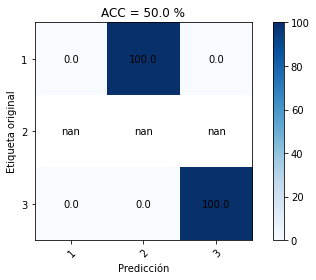

In [53]:
ypredict(filename,label_models,ytest[:2]) # podemos escoger los trials 

In [43]:
ytest[:3]

array([3, 1, 2])